# 3. Exploring a dictionary-based approach with Empath

Empath (see [Fast et al., 2016](https://dl.acm.org/doi/10.1145/2858036.2858535)) is a tool for analysing a given corpus of text to identify the occurrence of certain pre-defined linguistic categories (similar to what is provided by LIWC), but also provides us with a way to create our own linguistic categories based on the behaviour we might want to examine.

Empath does not come pre-installed with standard python distributions so you would need to install it on your system using the following command in your terminal:

````
pip install empath
````

In [1]:
import pandas as pd
from empath import Empath
lexicon = Empath()

In [2]:
transcript_df = pd.read_excel('data/excel/edi_2024_daniel_george.xlsx')
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance
306,306,00:23:26,George,Exports.
179,179,00:13:54,George,How do you make a cup?
235,235,00:18:20,Daniel,OK.


In [3]:
from datetime import time
def convert_to_seconds(t_str):
    t = time.fromisoformat(t_str)
    sec = t.hour * 3600 + t.minute * 60 + t.second
    return sec
    
transcript_df['timestamp_sec'] = transcript_df['timestamp'].apply(convert_to_seconds)
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance,timestamp_sec
17,17,00:01:20,George,"Yeah, it's fine.",80
381,381,00:30:40,Daniel,(Whispering),1840
189,189,00:14:39,Daniel,I don't know.,879


In [4]:
utterances = transcript_df['utterance'].to_list()

## Get the list of categories from Empath
Empath has a set of predefined categories. To create a new category of your own, use the following command.

In [5]:
lexicon.create_category("thinking", ["think", "make", "inspiration"])

["Because", "actually", "If", "write", "though", "guess", "cause", "Maybe", "maybe", "mean", "honestly", "like", "anyway", "inspiration", "hope", "understand", "might", "help", "cause", "try", "Now", "story", "Plus", "should", "work", "hopefully", "Or", "Also", "probably", "forget", "anyways", "Well", "motivation", "find", "whatever", "best", "wish", "so", "thought", "Honestly", "suppose", "means", "things", "anything", "add", "reason", "always", "believe", "Sometimes", "Actually", "wanted", "ideas", "So", "seriously", "remind", "cause", "anyway", "trust", "Hopefully", "figured", "part", "need", "Anyway"]


To analyze a piece of text using this category, use the following function.

In [6]:
lexicon.analyze("Let's maybe try this new approach.", categories=["thinking"], normalize=True)

{'thinking': 0.3333333333333333}

## Analysing a piece of text using Empath
Let's say you want to see if a text uses a higher density of `thinking` words (i.e, the number of 'positive emotion' words divided by the total words in the review) than another text. For that matter, we just want to see what the `thinking` scores are across all the reviews. We can use the following approach.

Some categories: prototyping, fixation, agreement, disagreement, insight

We can create a function for this approach so that we can pass this function to the dataframe.

In [7]:
def calc_thinking(text):
    category = 'thinking'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

transcript_df['thinking'] = transcript_df['utterance'].apply(calc_thinking)
                                                                
transcript_df.sample(5)                                                                               

,Unnamed: 0,timestamp,speaker,utterance,timestamp_sec,thinking
180,180,00:14:17,George,"Well, this is the plate.",857,0.000000
169,169,00:13:16,Yuxuan,"You know, like how they fold those, like reall...",796,0.105263
438,438,00:38:49,Daniel,"And and or change the music. Yeah, yeah.",2329,0.000000
51,51,00:04:04,George,Chopsticks what? Chopsticks? How are you gonna...,244,0.000000
350,350,00:27:33,Daniel,"Yeah, I think we got some background. Yeah, th...",1653,0.000000


We can then plot a histogram of the scores to see their distribution.

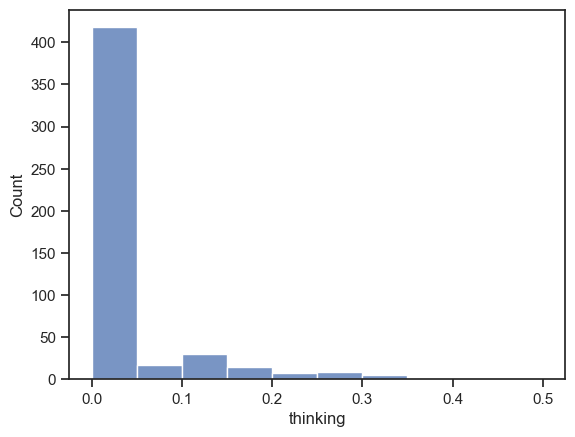

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')
sns.set_style('ticks')
plt.figure(dpi=100)

g = sns.histplot(x='thinking', data=transcript_df)

<Figure size 640x480 with 0 Axes>

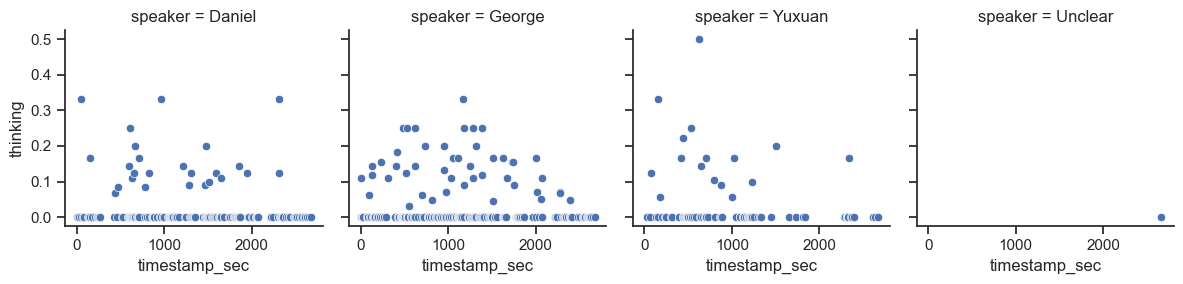

In [9]:
plt.figure(dpi=100)
g = sns.FacetGrid(transcript_df, col="speaker")
g.map(sns.scatterplot, "timestamp_sec", "thinking")


## A similar approach for sentiment analysis

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
def sentiment(text) :
    vs = analyzer.polarity_scores(text)['compound']
    return vs

In [12]:
transcript_df['sentiment'] = transcript_df['utterance'].apply(sentiment)
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance,timestamp_sec,thinking,sentiment
296,296,00:22:31,Daniel,It works.,1351,0.0,0.0000
278,278,00:21:15,George,Are you fine with just being 40 seconds?,1275,0.0,0.2023
320,320,00:24:55,Daniel,Of course.,1495,0.0,0.0000


<Figure size 640x480 with 0 Axes>

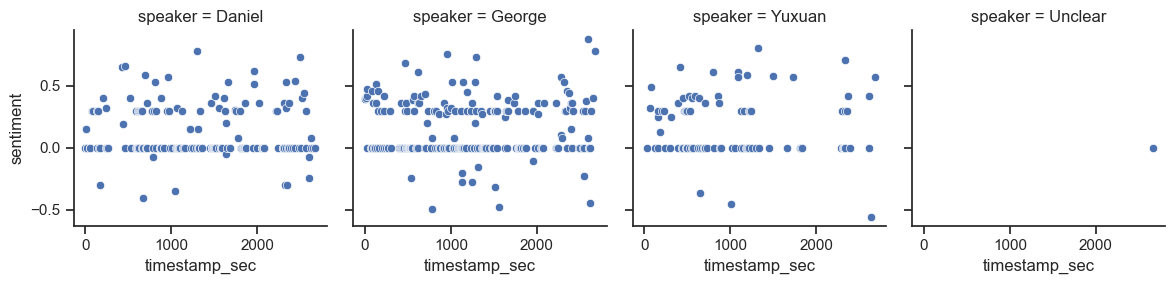

In [13]:
plt.figure(dpi=100)
g = sns.FacetGrid(transcript_df, col="speaker")
g.map(sns.scatterplot, "timestamp_sec", "sentiment")

<Axes: xlabel='thinking', ylabel='sentiment'>

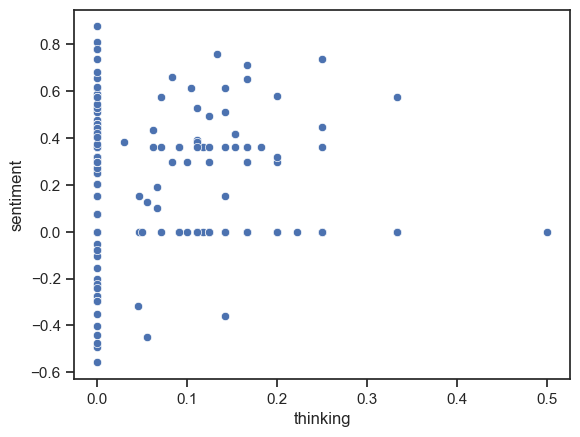

In [14]:
sns.scatterplot(data=transcript_df, x = "thinking", y="sentiment")

## Exercise

Identify a particular behaviour you notice in your session's transcript.


**Specify:** think of words related to "convergence"

Can you create an Empath category for this behaviour?
Analyze the transcript with your new category.
Compare your transcript with someone else's?

